# 1. Installing libraries and importing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json

In [2]:
path = r'/Users/bazillaimran/Documents/03-2024 Airbnb US Analysis'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','vacation_price_listings_subset.csv'),index_col = False)

In [4]:
country_geo = '/Users/bazillaimran/Documents/03-2024 Airbnb US Analysis/02 Data/Original Data/us-states.json'

In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host,booking_requirement,popularity
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental,mid-price,500 or less,less than 1 week,booked half year
1,1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental,mid-price,500 or less,over 3 weeks,unbooked
2,3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental,high price,500 or less,1-3 weeks,unbooked
3,4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,booked half year
4,5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Bayview,37.71750,-122.39698,Private room,95,1,19,1/28/23,0.12,2,365,1,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,unbooked


In [7]:
country_geo

'/Users/bazillaimran/Documents/03-2024 Airbnb US Analysis/02 Data/Original Data/us-states.json'

In [8]:
# Checking at the JSON file contents:
with open('/Users/bazillaimran/Documents/03-2024 Airbnb US Analysis/02 Data/Original Data/us-states.json', 'r') as f:
    data = json.load(f)

# 2. Data Wrangling

In [9]:
df

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host,booking_requirement,popularity
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental,mid-price,500 or less,less than 1 week,booked half year
1,1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental,mid-price,500 or less,over 3 weeks,unbooked
2,3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental,high price,500 or less,1-3 weeks,unbooked
3,4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.760300,-122.421970,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,booked half year
4,5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Bayview,37.717500,-122.396980,Private room,95,1,19,1/28/23,0.12,2,365,1,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,unbooked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204449,232142,849230448624862502,Private Half Moon Bay Oasis By Pillar Point Be...,29395385,Khalid,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,0,0,0.00,1,365,0,San Mateo County,Vacation Rental,mid-price,500 or less,less than 1 week,unbooked
204450,232143,850805127216414630,Home near SFO,440957696,Christina,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,0,0,0.00,1,364,0,San Mateo County,Vacation Rental,mid-price,500 or less,less than 1 week,unbooked
204451,232144,851562104616413652,Modern New Private Studio in SFO,41574587,Vality,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,0,0,0.00,32,359,0,San Mateo County,Vacation Rental,low price,500 or less,less than 1 week,available half year
204452,232145,851792795339759410,Lux Bedroom with a Shared Bath near SFO,73133543,Stephannie,South San Francisco,37.644792,-122.454213,Private room,62,2,0,0,0.00,3,67,0,San Mateo County,Vacation Rental,low price,500 or less,less than 1 week,booked half year


In [10]:
df.shape

(204454, 23)

In [11]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'listing_name', 'host_id', 'host_name',
       'neighborhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_12_month_reviews_count', 'city',
       'rental_type', 'price_category', 'listings_per_host',
       'booking_requirement', 'popularity'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204454 entries, 0 to 204453
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      204454 non-null  int64  
 1   listing_id                      204454 non-null  int64  
 2   listing_name                    204438 non-null  object 
 3   host_id                         204454 non-null  int64  
 4   host_name                       204454 non-null  object 
 5   neighborhood                    204454 non-null  object 
 6   latitude                        204454 non-null  float64
 7   longitude                       204454 non-null  float64
 8   room_type                       204454 non-null  object 
 9   price                           204454 non-null  int64  
 10  minimum_nights                  204454 non-null  int64  
 11  number_of_reviews               204454 non-null  int64  
 12  last_review     

In [13]:
df.dtypes

Unnamed: 0                          int64
listing_id                          int64
listing_name                       object
host_id                             int64
host_name                          object
neighborhood                       object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
last_12_month_reviews_count         int64
city                               object
rental_type                        object
price_category                     object
listings_per_host                  object
booking_requirement                object
popularity                         object
dtype: object

In [14]:
df.isna().sum()

Unnamed: 0                         0
listing_id                         0
listing_name                      16
host_id                            0
host_name                          0
neighborhood                       0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
last_12_month_reviews_count        0
city                               0
rental_type                        0
price_category                     0
listings_per_host                  0
booking_requirement                0
popularity                         0
dtype: int64

In [15]:
#Deleted unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [16]:
#Checked for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
204449    False
204450    False
204451    False
204452    False
204453    False
Length: 204454, dtype: bool

In [17]:
# merge longitude and latitude columns 
df['coordinates'] = df[['latitude', 'longitude']].apply(lambda x: f'({x[0]}, {x[1]})', axis=1)

/var/folders/17/9z1yp8ss3r174mlj49ql3qgr0000gn/T/ipykernel_86754/4033766620.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['coordinates'] = df[['latitude', 'longitude']].apply(lambda x: f'({x[0]}, {x[1]})', axis=1)


In [18]:
df.head()

,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host,booking_requirement,popularity,coordinates
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental,mid-price,500 or less,less than 1 week,booked half year,"(37.77028, -122.43317)"
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental,mid-price,500 or less,over 3 weeks,unbooked,"(37.74474, -122.42089)"
2,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental,high price,500 or less,1-3 weeks,unbooked,"(37.77564, -122.43642)"
3,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,booked half year,"(37.7603, -122.42197)"
4,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Bayview,37.71750,-122.39698,Private room,95,1,19,1/28/23,0.12,2,365,1,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,unbooked,"(37.7175, -122.39698)"


In [19]:
# Create a state column
#Get unique cities
unique_cities = df['city'].unique()

# Print the unique cities
print("Unique cities:")
for city in unique_cities:
    print(city)

Unique cities:
San Francisco
Washington D.C.
Oakland
Jersey City
New Orleans
Los Angeles
New York City
Cambridge
Santa Clara County
Asheville
Salem
Columbus
Rhode Island
San Diego
Nashville
Santa Cruz County
Denver
Chicago
Austin
Pacific Grove
Portland
Seattle
Twin Cities MSA
Broward County
Clark County
Boston
San Mateo County


In [20]:
# Dictionary mapping cities to states
city_state_mapping = {
    'San Francisco': 'California',
    'Washington D.C.': 'District of Columbia',
    'Oakland': 'California',
    'Jersey City': 'New Jersey',
    'New Orleans': 'Louisiana',
    'Los Angeles': 'California',
    'New York City': 'New York',
    'Cambridge': 'Massachusetts',
    'Santa Clara County': 'California',
    'Asheville': 'North Carolina',
    'Salem': 'Oregon',
    'Columbus': 'Ohio',
    'Rhode Island': 'Rhode Island',
    'San Diego': 'California',
    'Nashville': 'Tennessee',
    'Santa Cruz County': 'California',
    'Denver': 'Colorado',
    'Chicago': 'Illinois',
    'Austin': 'Texas',
    'Pacific Grove': 'California',
    'Portland': 'Oregon',
    'Seattle': 'Washington',
    'Twin Cities MSA': 'Minnesota',
    'Broward County': 'Florida',
    'Clark County': 'Nevada',
    'Boston': 'Massachusetts',
    'San Mateo County': 'California'
}

In [21]:
# Convert the dictionary into a DataFrame
city_state_df = pd.DataFrame(list(city_state_mapping.items()), columns=['city', 'state'])

In [22]:
# Display the DataFrame
print(city_state_df)

                  city                 state
0        San Francisco            California
1      Washington D.C.  District of Columbia
2              Oakland            California
3          Jersey City            New Jersey
4          New Orleans             Louisiana
5          Los Angeles            California
6        New York City              New York
7            Cambridge         Massachusetts
8   Santa Clara County            California
9            Asheville        North Carolina
10               Salem                Oregon
11            Columbus                  Ohio
12        Rhode Island          Rhode Island
13           San Diego            California
14           Nashville             Tennessee
15   Santa Cruz County            California
16              Denver              Colorado
17             Chicago              Illinois
18              Austin                 Texas
19       Pacific Grove            California
20            Portland                Oregon
21        

In [23]:
# Merge the df with the new city_state_df
df_with_states = df.merge(city_state_df, on='city', how='left')

In [24]:
# Display the merged DataFrame
df_with_states.head()

,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host,booking_requirement,popularity,coordinates,state
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental,mid-price,500 or less,less than 1 week,booked half year,"(37.77028, -122.43317)",California
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental,mid-price,500 or less,over 3 weeks,unbooked,"(37.74474, -122.42089)",California
2,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental,high price,500 or less,1-3 weeks,unbooked,"(37.77564, -122.43642)",California
3,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,booked half year,"(37.7603, -122.42197)",California
4,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Bayview,37.71750,-122.39698,Private room,95,1,19,1/28/23,0.12,2,365,1,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,unbooked,"(37.7175, -122.39698)",California


# 3. Checking for extreme values

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


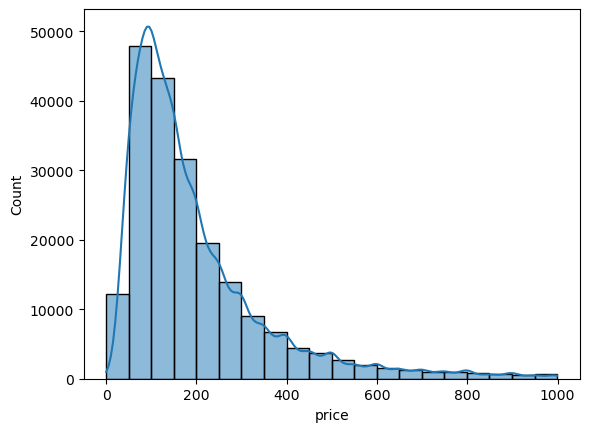

In [25]:
#Created a histogram for extreme values for price
hist_price = sns.histplot(df['price'], bins = 20, kde = True)

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


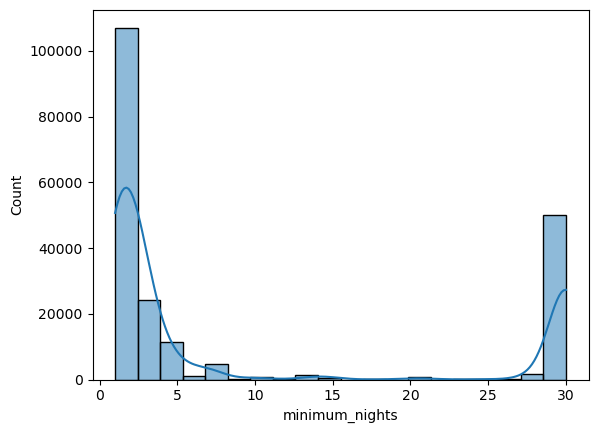

In [26]:
#Created a histogram for extreme values for minimum_nights
hist_minimum_nights = sns.histplot(df['minimum_nights'], bins = 20, kde = True)

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


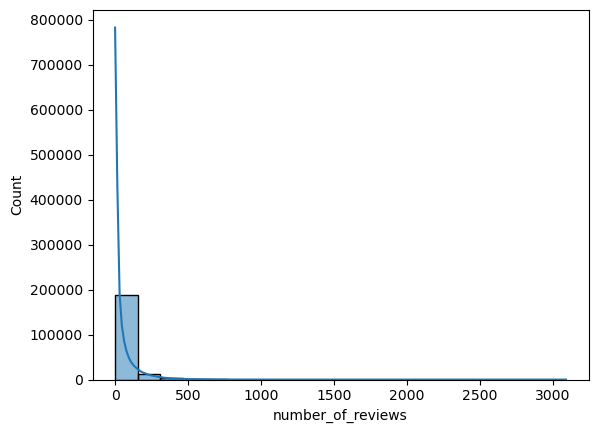

In [27]:
#Created a histogram for extreme values for number_of_reviews
hist_minimum_nights = sns.histplot(df['number_of_reviews'], bins = 20, kde = True)

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


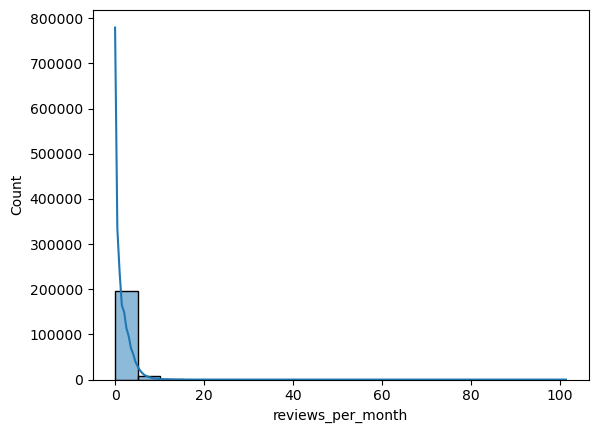

In [28]:
#Created a histogram for extreme values for reviews_per_month
hist_reviews_per_month = sns.histplot(df['reviews_per_month'], bins = 20, kde = True)

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


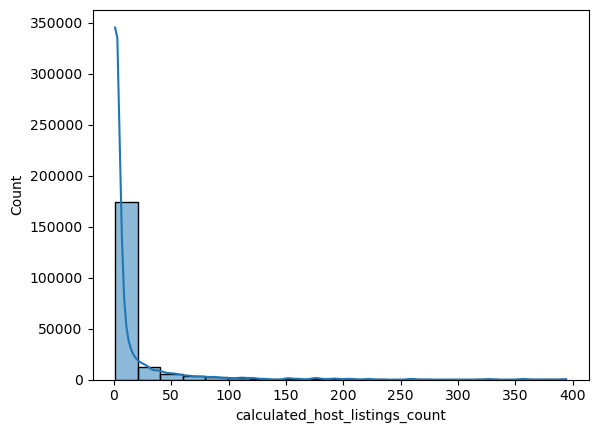

In [29]:
#Created a histogram for extreme values for calculated_host_listings_count
hist_calculated_host_listings_count = sns.histplot(df['calculated_host_listings_count'], bins = 20, kde = True)

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


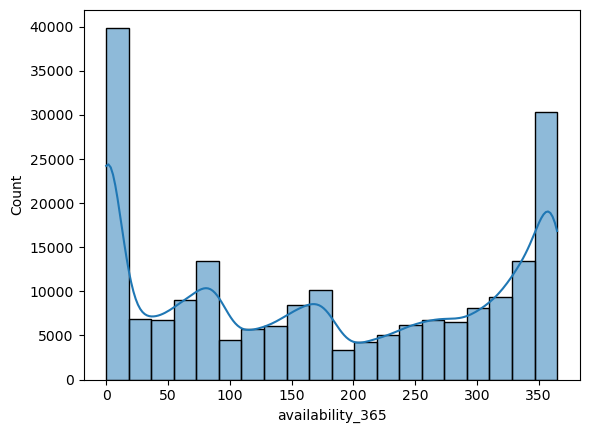

In [30]:
#Created a histogram for extreme values for availability_365
hist_availability_365 = sns.histplot(df['availability_365'], bins = 20, kde = True)

# 4. Plotting a Choropleth

In [31]:
# Creating a data frame with states and number of reviews 
n_reviews_per_state = df_with_states[['state','number_of_reviews']]
n_reviews_per_state.head()

,state,number_of_reviews
0,California,383
1,California,111
2,California,28
3,California,770
4,California,19


In [32]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = n_reviews_per_state,
    columns = ['state','number_of_reviews'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "number_of_reviews").add_to(map)

folium.LayerControl().add_to(map)

map

Based on the choropleth map displaying the number of reviews per listings, it is evident that the Colorado region stands out with significantly higher numbers of reviews, compared to all other states where the number of reviews for listings remains consistently below 64. Further analysis is warranted to investigate if there are any specific factors contributing to the unusually high number of reviews in Colorado.

### Exploring and handling extreme values for number of reviews for colorado state 

In [33]:
# Furter investigating Colorado's unusally high number of reviews
# Check for missing values and data types
colorado_reviews = df_with_states[df_with_states['state'] == 'Colorado']['number_of_reviews']
print("Number of missing values in Colorado reviews:", colorado_reviews.isnull().sum())
print("Data type of Colorado reviews column:", colorado_reviews.dtype)

Number of missing values in Colorado reviews: 0
Data type of Colorado reviews column: int64


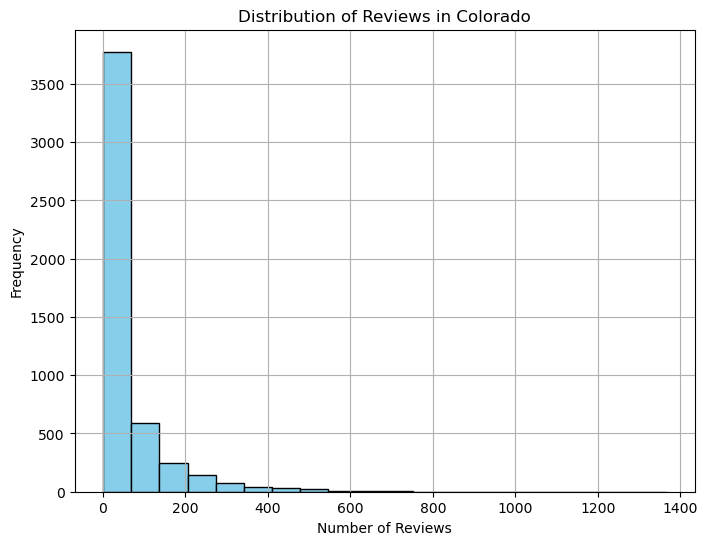

In [34]:
# Explore data distribution
plt.figure(figsize=(8, 6))
plt.hist(colorado_reviews, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews in Colorado')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
# Summary statistics
print("Summary statistics for Colorado reviews:")
print(colorado_reviews.describe())

Summary statistics for Colorado reviews:
count    4949.000000
mean       54.917357
std        96.876895
min         0.000000
25%         2.000000
50%        15.000000
75%        64.000000
max      1367.000000
Name: number_of_reviews, dtype: float64


In [36]:
# Calculate the first and third quartiles
Q1 = colorado_reviews.quantile(0.25)
Q3 = colorado_reviews.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = colorado_reviews[(colorado_reviews < lower_bound) | (colorado_reviews > upper_bound)]

print("Lower bound for potential outliers:", lower_bound)
print("Upper bound for potential outliers:", upper_bound)
print("Potential outliers:")
print(outliers)

Lower bound for potential outliers: -91.0
Upper bound for potential outliers: 157.0
Potential outliers:
132327    176
132328    184
132330    239
132332    174
132333    682
         ... 
137250    315
137264    263
137269    263
137270    272
137274    382
Name: number_of_reviews, Length: 488, dtype: int64


In [37]:
# Filter out outliers for Colorado
filtered_colorado_reviews = colorado_reviews[(colorado_reviews >= lower_bound) & (colorado_reviews <= upper_bound)]

# Create a new DataFrame without outliers for Colorado
df_colorado_without_outliers = df_with_states[df_with_states['state'] == 'Colorado'].loc[filtered_colorado_reviews.index]

# Create a new DataFrame without outliers for all states (including Colorado)
df_without_outliers = df_with_states.copy()  # Make a copy of the original DataFrame
df_without_outliers.loc[df_without_outliers['state'] == 'Colorado'] = df_colorado_without_outliers  # Replace Colorado entries with filtered ones

# Display the new DataFrame without outliers
print(df_without_outliers)

          listing_id                                       listing_name  \
0       9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
1       5.858000e+03                                 Creative Sanctuary   
2       8.339000e+03                    Historic Alamo Square Victorian   
3       8.739000e+03                Mission Sunshine, with Private Bath   
4       1.053700e+04  Elegant & Cozy w/City views. Private room: Purple   
...              ...                                                ...   
204449  8.492304e+17  Private Half Moon Bay Oasis By Pillar Point Be...   
204450  8.508051e+17                                      Home near SFO   
204451  8.515621e+17                   Modern New Private Studio in SFO   
204452  8.517928e+17            Lux Bedroom with a Shared Bath near SFO   
204453  8.518013e+17             Lux Bedroom with Private Bath near SFO   

            host_id         host_name          neighborhood   latitude  \
0            1169.0      

In [38]:
# Creating a data new frame with states and number of reviews 
n_reviews_per_state_2 = df_without_outliers[['state','number_of_reviews']]
n_reviews_per_state_2.head()

,state,number_of_reviews
0,California,383.0
1,California,111.0
2,California,28.0
3,California,770.0
4,California,19.0


In [39]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = n_reviews_per_state_2,
    columns = ['state','number_of_reviews'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "number_of_reviews").add_to(map)

folium.LayerControl().add_to(map)

map

After further analysis and outlier removal, Colorado still tops the list with the highest review count, but with a more balanced distribution. The total reviews across all states have decreased, suggesting fairer representation. Washington, with its high review count, has emerged as the second major contributor. The outlier removal has enhanced comparability between states and clarified the review distribution.This also correlates with the reviews per month map, where Colorado and Washington are among the top-reviewed states.

In [40]:
# Save the map as an HTML file
map.save('n_reviews_per_state_2_interactive_map.html')

In [41]:
# Creating a data frame with cities and reviews_per_month 
review_per_month_by_state = df_with_states[['state','reviews_per_month']]
review_per_month_by_state.head()

,state,reviews_per_month
0,California,2.31
1,California,0.66
2,California,0.17
3,California,4.65
4,California,0.12


In [42]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = review_per_month_by_state,
    columns = ['state','reviews_per_month'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "reviews_per_month").add_to(map)

folium.LayerControl().add_to(map)

map

The highest number of reviews per month are for Colorado, followed by Washington and Illinois.

In [43]:
# Save the map as an HTML file
map.save('review_per_month_by_state_interactive_map.html')

In [44]:
# Creating a data frame with states and prices 
prices_per_state = df_with_states[['state','price']]
prices_per_state.head()

,state,price
0,California,202
1,California,235
2,California,575
3,California,110
4,California,95


In [45]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = prices_per_state,
    columns = ['state','price'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "prices_per_city").add_to(map)

folium.LayerControl().add_to(map)

map

The highest prices per listing are found in the Louisiana and Rhode Island regions, followed by New York. The third-highest prices are seen in New Jersey and Minnesota, then Boston, then Tennessee. Beyond these, other states with Airbnb listings have a very similar price range for their properties.

In [46]:
# Save the map as an HTML file
map.save('prices_per_state_interactive_map.html')

In [47]:
# Creating a data frame with states and availability 
availability_per_state = df_with_states[['state','availability_365']]
availability_per_state.head()

,state,availability_365
0,California,128
1,California,365
2,California,365
3,California,159
4,California,365


In [48]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = availability_per_state,
    columns = ['state','availability_365'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "availability_per_city").add_to(map)

folium.LayerControl().add_to(map)

map

States with the most availability throughout the year include Texas, Oregon, Minnesota, Ohio, New Jersey, Rhode Island, and Louisiana. This is followed by Nevada, then Illinois, Washington, Tennessee, Colorado, New York, and Boston. The states with the least availability are California, Florida, and North Carolina.

In [49]:
# Save the map as an HTML file
map.save('availability_per_state_interactive_map.html')

# 5. Export df_with_state

In [50]:
#Exporting subset of df_with_state 
df_with_states.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_with_states.csv'))